In [106]:
import os
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Markdown

from utils.dlt import *
from utils.skeleton_keypoints import angle_keypoints_dict

output_dir = "pp"
os.makedirs(output_dir, exist_ok=True) 

In [107]:
split_range = [2500, 2000, 1500, 1000, 500, 0, -500, -1100]

df_summary = pd.DataFrame(columns=[f"Split_{i}" for i in range(len(split_range))])
for data_num in range(10):
    true_path = f"transformed_keypoints/hirasaki_{data_num}_true.csv"
    df_true = pd.read_csv(true_path, index_col=0)
    df_true["CENTER_HIP_y"] = (df_true["RIGHT_HIP_y"] + df_true["LEFT_HIP_y"]) / 2
    for i, split_value in enumerate(split_range):
        idx = (df_true["CENTER_HIP_y"] - split_value).abs().idxmin()
        df_summary.loc[data_num, f"Split_{i}"] = idx

display(df_summary)

Split_0 Split_1 Split_2 Split_3 Split_4 Split_5 Split_6 Split_7
0      71      73      98     120     139     161     184     208
1       1      80     106     128     148     170     194     218
2      24      88     112     133     152     175     199     224
3      45     111     136     158     177     199     222     246
4      12      56      82     104     124     145     167     190
5      45      96     120     140     161     183     205     227
6      46      99     124     145     166     189     213     235
7     105     131     155     177     197     219     242     265
8      18      62      86     107     127     150     172     194
9       7      62      89     112     133     155     178     200

In [108]:
dfs = []

for data_num in range(10):
    error_path = f"error/hirasaki_{data_num}_errors.csv"
    df_error = pd.read_csv(error_path, index_col=0)
    
    df_error.index = pd.MultiIndex.from_product([[data_num], df_error.index], names=["data_num", "frame"])
    
    dfs.append(df_error)

df_combined = pd.concat(dfs)

display(df_combined.head())
display(df_combined.tail())

01_mpjpe  01_RIGHT_ELBOW_ANGLE_angle  \
data_num frame                                         
0        71        31.12                        4.65   
         72        29.88                        3.59   
         73        32.82                        1.57   
         74        31.62                        1.46   
         75        28.69                        2.30   

                01_LEFT_ELBOW_ANGLE_angle  01_RIGHT_KNEE_ANGLE_angle  \
data_num frame                                                         
0        71                          1.56                       1.59   
         72                          0.81                       0.15   
         73                          1.24                       1.46   
         74                          0.99                       1.94   
         75                          0.59                       1.05   

                01_LEFT_KNEE_ANGLE_angle  01_RIGHT_NKEE_UP_ANGLE_angle  \
data_num frame                                                           
0        71                         8.08                          0.33   
         72                         7.62                          1.52   
         73                         6.96                          2.70   
         74                         7.35                          3.42   
         75                         7.36                          3.47   

                01_LEFT_NKEE_UP_ANGLE_angle  02_mpjpe  \
data_num frame                                          
0        71                            8.01     28.52   
         72                            5.65     29.52   
         73                            4.43     32.48   
         74                            4.08     31.60   
         75                            3.11     29.04   

                02_RIGHT_ELBOW_ANGLE_angle  02_LEFT_ELBOW_ANGLE_angle  \
data_num frame                                                          
0        71                           2.07                       0.93   
         72                           2.09                       0.38   
         73                           1.00                       1.12   
         74                           0.41                       0.76   
         75                           1.51                       0.40   

                02_RIGHT_KNEE_ANGLE_angle  02_LEFT_KNEE_ANGLE_angle  \
data_num frame                                                        
0        71                          1.62                      4.55   
         72                          0.28                      5.17   
         73                          1.62                      5.02   
         74                          2.24                      5.83   
         75                          0.92                      5.97   

                02_RIGHT_NKEE_UP_ANGLE_angle  02_LEFT_NKEE_UP_ANGLE_angle  \
data_num frame                                                              
0        71                             0.03                         3.70   
         72                             0.72                         3.14   
         73                             2.55                         3.17   
         74                             2.76                         2.56   
         75                             2.39                         1.53   

                03_mpjpe  03_RIGHT_ELBOW_ANGLE_angle  \
data_num frame                                         
0        71        32.21                        1.89   
         72        32.95                        1.98   
         73        35.74                        0.04   
         74        35.35                        1.31   
         75        32.97                        1.09   

                03_LEFT_ELBOW_ANGLE_angle  03_RIGHT_KNEE_ANGLE_angle  \
data_num frame                                                         
0        71                          0.86                       1.17   
         72                          0.6

01_mpjpe  01_RIGHT_ELBOW_ANGLE_angle  \
data_num frame                                         
9        196       56.52                        3.40   
         197       54.16                        1.51   
         198       57.48                        0.50   
         199       57.18                        2.18   
         200       57.23                        2.44   

                01_LEFT_ELBOW_ANGLE_angle  01_RIGHT_KNEE_ANGLE_angle  \
data_num frame                                                         
9        196                         0.44                       2.43   
         197                         1.58                       1.83   
         198                         2.12                       1.48   
         199                         1.88                       0.30   
         200                         0.20                       0.46   

                01_LEFT_KNEE_ANGLE_angle  01_RIGHT_NKEE_UP_ANGLE_angle  \
data_num frame                                                           
9        196                       14.87                          1.14   
         197                       15.35                          2.03   
         198                       17.70                          4.12   
         199                       20.23                          6.47   
         200                       21.95                          8.26   

                01_LEFT_NKEE_UP_ANGLE_angle  02_mpjpe  \
data_num frame                                          
9        196                           7.73     39.82   
         197                           7.58     38.99   
         198                           6.87     45.08   
         199                           6.60     46.17   
         200                           6.47     47.03   

                02_RIGHT_ELBOW_ANGLE_angle  02_LEFT_ELBOW_ANGLE_angle  \
data_num frame                                                          
9        196                          8.62                       2.12   
         197                         13.44                       1.34   
         198                          4.81                       0.50   
         199                          7.71                       0.49   
         200                          3.62                       1.14   

                02_RIGHT_KNEE_ANGLE_angle  02_LEFT_KNEE_ANGLE_angle  \
data_num frame                                                        
9        196                         3.24                     12.76   
         197                         3.23                     12.45   
         198                         3.38                     13.78   
         199                         0.82                     16.10   
         200                         1.74                     16.80   

                02_RIGHT_NKEE_UP_ANGLE_angle  02_LEFT_NKEE_UP_ANGLE_angle  \
data_num frame                                                              
9        196                            0.81                         3.99   
         197                            0.10                         4.45   
         198                            1.27                         4.76   
         199                            4.13                         6.43   
         200                            6.42                         6.75   

                03_mpjpe  03_RIGHT_ELBOW_ANGLE_angle  \
data_num frame                                         
9        196      140.52                       62.00   
         197      147.32                       36.86   
         198      187.68                       25.18   
         199      299.65                       15.84   
         200      364.92                        5.22   

                03_LEFT_ELBOW_ANGLE_angle  03_RIGHT_KNEE_ANGLE_angle  \
data_num frame                                                         
9        196                        38.19                       2.50   
         197                        49.1

In [109]:
mpjpes = df_combined.filter(regex="mpjpe").rename(columns=lambda x: x.replace("_mpjpe", ""))
relbow = df_combined.filter(regex="RIGHT_ELBOW_ANGLE_angle").rename(columns=lambda x: x.replace("_RIGHT_ELBOW_ANGLE_angle", ""))
lelbow = df_combined.filter(regex="LEFT_ELBOW_ANGLE_angle").rename(columns=lambda x: x.replace("_LEFT_ELBOW_ANGLE_angle", ""))
rknee = df_combined.filter(regex="RIGHT_KNEE_ANGLE_angle").rename(columns=lambda x: x.replace("_RIGHT_KNEE_ANGLE_angle", ""))
lknee = df_combined.filter(regex="LEFT_KNEE_ANGLE_angle").rename(columns=lambda x: x.replace("_LEFT_KNEE_ANGLE_angle", ""))
rkneeup = df_combined.filter(regex="RIGHT_NKEE_UP_ANGLE_angle").rename(columns=lambda x: x.replace("_RIGHT_NKEE_UP_ANGLE_angle", ""))
lkneeup = df_combined.filter(regex="LEFT_NKEE_UP_ANGLE_angle").rename(columns=lambda x: x.replace("_LEFT_MKEE_UP_ANGLE_angle", ""))

In [110]:
display(Markdown("## MPJPE"))
display(mpjpes.aggregate(["mean", "std"]))
display(Markdown("## Elbow Joint Angle"))
display(relbow.aggregate(["mean", "std"]))
display(lelbow.aggregate(["mean", "std"]))
display(Markdown("## Knee Joint Angle"))
display(rknee.aggregate(["mean", "std"]))
display(lknee.aggregate(["mean", "std"]))

## MPJPE

01    02    03     04    12    13    14    23    24    34   012   013  \
mean 42.71 32.10 54.27 111.12 30.84 32.00 45.95 27.92 29.56 37.50 31.73 34.34   
std  10.70  6.52 66.95 247.20  6.38 10.63 29.21  6.13  6.75 10.69  6.33  8.54   

       014   023   024   034   123   124   134   234  0123  0124  0134  0234  \
mean 36.29 31.25 30.39 36.76 27.27 29.42 30.46 27.65 29.72 29.71 31.86 29.40   
std   7.84  6.13  6.49  9.72  5.89  6.44  7.94  6.21  5.85  6.18  7.10  6.26   

      1234  01234  
mean 26.90  28.42  
std   5.92   5.99

## Elbow Joint Angle

01   02   03    04   12   13    14   23   24   34  012  013  014  023  \
mean 12.28 4.28 5.36 14.26 9.49 7.55  9.39 3.59 2.74 2.22 5.13 6.56 7.45 3.68   
std  13.16 4.01 7.19 24.01 8.77 7.07 11.84 2.06 1.87 1.74 4.18 5.94 8.86 3.06   

      024  034  123  124  134  234  0123  0124  0134  0234  1234  01234  
mean 2.63 3.53 5.01 2.81 4.80 2.45  3.94  3.22  4.90  2.66  2.78   2.98  
std  2.34 3.57 3.05 2.07 4.62 1.65  2.74  2.49  4.55  2.25  1.90   2.11

01   02    03    04   12   13    14    23   24    34  012  013  014  \
mean 2.97 2.45 10.53 11.20 3.72 6.81  6.54  7.70 3.90 10.79 2.65 4.96 3.44   
std  6.28 6.59 15.07 17.74 6.31 8.43 10.71 10.36 7.23 15.21 6.36 7.52 6.81   

      023  024   034  123  124  134  234  0123  0124  0134  0234  1234  01234  
mean 3.08 2.74  6.44 5.22 3.48 5.37 4.72  3.20  2.72  4.20  3.31  3.70   2.90  
std  6.76 6.69 10.73 7.16 6.81 7.71 7.43  6.48  6.49  7.36  6.88  6.56   6.50

## Knee Joint Angle

01   02   03   04   12   13   14   23   24   34  012  013  014  023  \
mean 3.50 3.61 3.63 6.15 2.69 2.29 4.61 2.83 4.63 5.26 2.93 2.60 3.78 3.20   
std  2.80 2.94 3.50 5.60 2.16 1.72 3.75 2.19 2.37 2.98 2.31 2.05 2.14 2.49   

      024  034  123  124  134  234  0123  0124  0134  0234  1234  01234  
mean 3.85 3.63 2.19 3.84 3.08 4.20  2.65  3.45  3.06  3.56  3.25   3.14  
std  2.46 2.44 1.56 2.27 1.82 2.05  1.97  2.19  2.02  2.36  1.87   2.05

01   02   03   04   12   13   14   23   24   34  012  013  014  023  \
mean 3.86 3.22 3.85 4.19 3.72 2.71 2.54 2.48 2.71 2.45 3.18 2.81 2.75 2.66   
std  3.40 3.07 3.65 3.83 3.40 1.85 2.76 2.01 2.69 2.01 2.94 2.18 2.48 2.36   

      024  034  123  124  134  234  0123  0124  0134  0234  1234  01234  
mean 2.81 2.51 2.51 2.38 1.87 1.95  2.64  2.63  2.27  2.33  1.86   2.22  
std  2.57 2.20 1.83 2.45 1.49 1.80  2.23  2.46  1.98  2.20  1.70   2.09

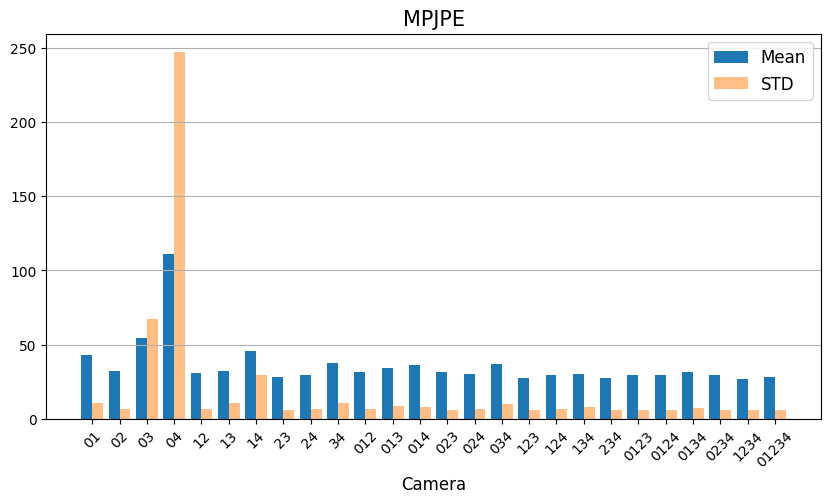

In [111]:
x = np.arange(len(mpjpes.columns))
width = 0.4

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(x - width/2, mpjpes.mean(), width=width, label="Mean")
ax.bar(x + width/2, mpjpes.std(), width=width, alpha=0.5, label="STD")

ax.set_xticks(x)
ax.set_xticklabels(mpjpes.columns, rotation=45)
ax.legend(fontsize=12)
ax.grid(axis="y")
ax.set_xlabel("Camera", fontsize=12)

plt.title("MPJPE", fontsize=15)
plt.savefig(f"{output_dir}/mpjpe_avg_std.png")
plt.show()

In [112]:
df_combined["Split"] = None
for data_num in range(10):
    splits = df_summary.loc[data_num]
    data = df_combined.loc[data_num]
    for i in range(len(splits)-1):
        df_combined.loc[(data_num, slice(splits[i], splits[i+1]-1)), "Split"] = i

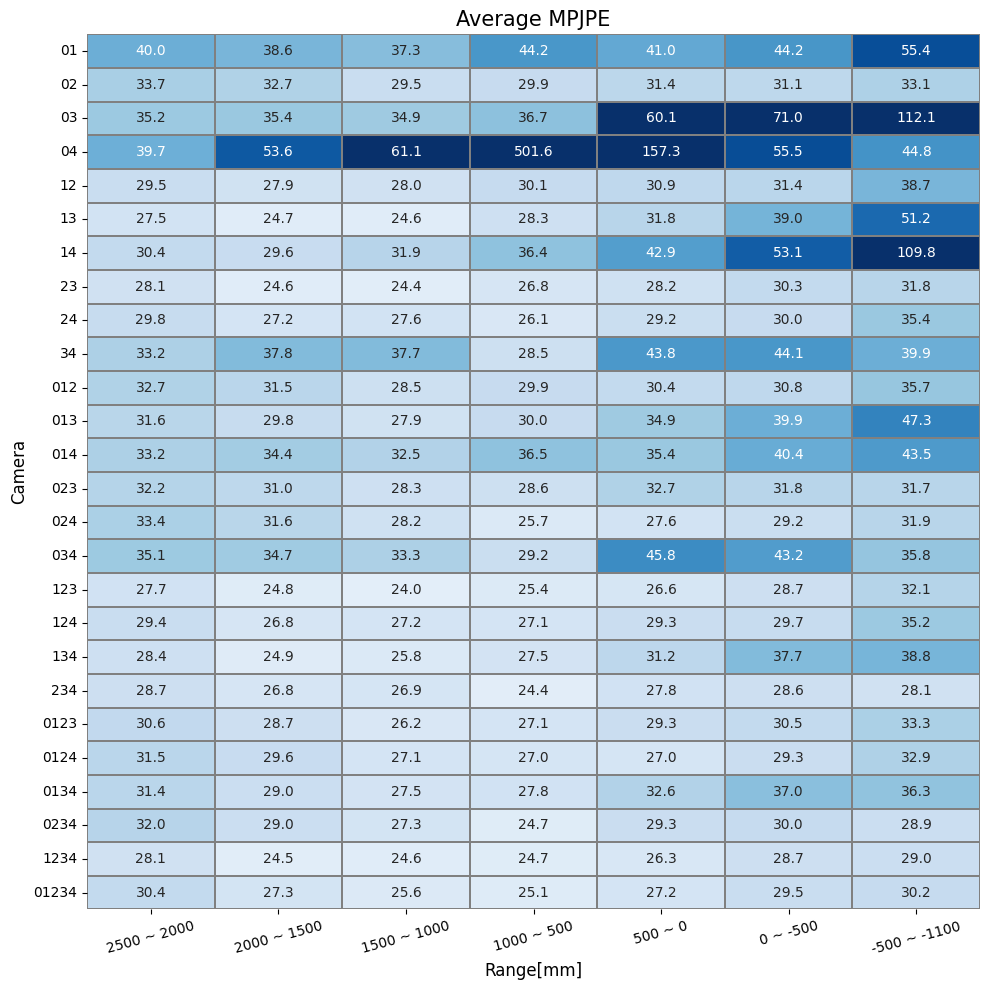

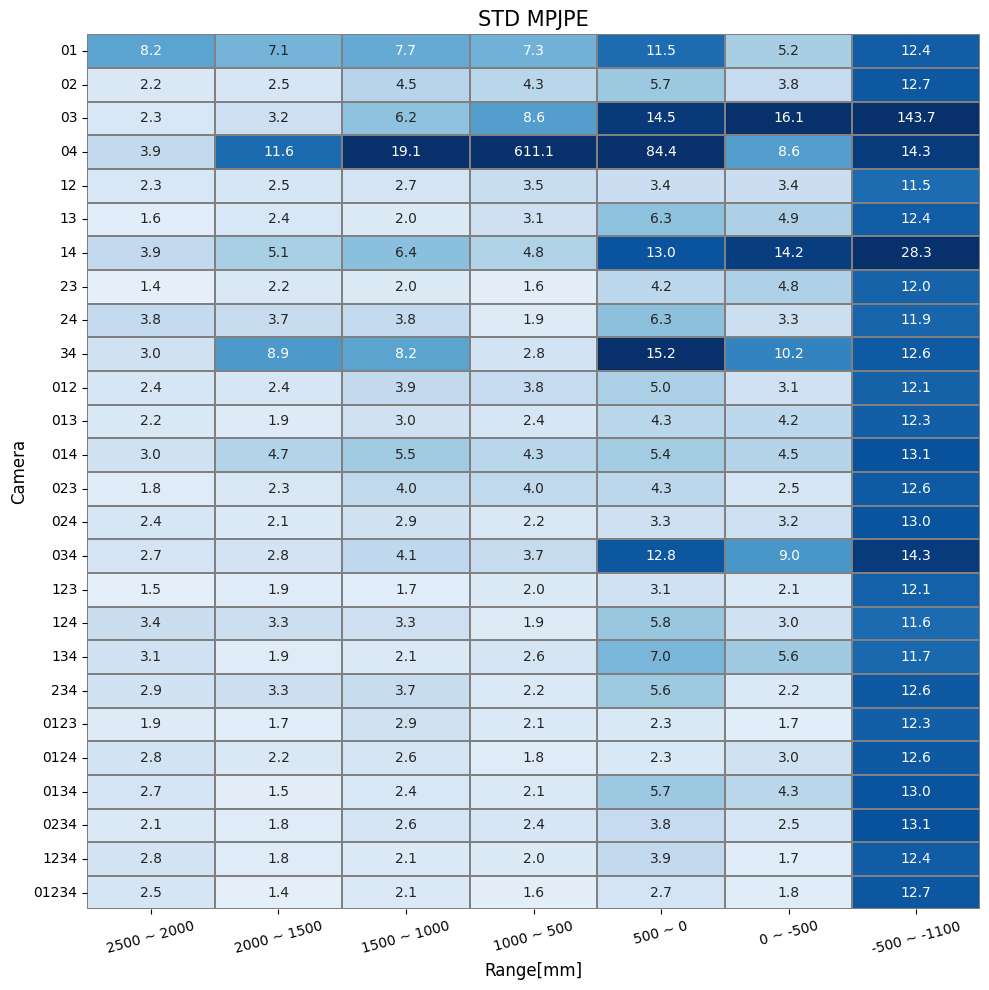

In [113]:
target_name = "mpjpe"
target_columns = df_combined.filter(regex=target_name).columns.tolist() + ["Split"]
split_mean = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").mean()
split_std = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").std()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_mean.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=60, vmin=20, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("Average MPJPE", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_mpjpe_average_heatmap.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_std.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=15, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("STD MPJPE", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_mpjpe_std_heatmap.png")
plt.show()

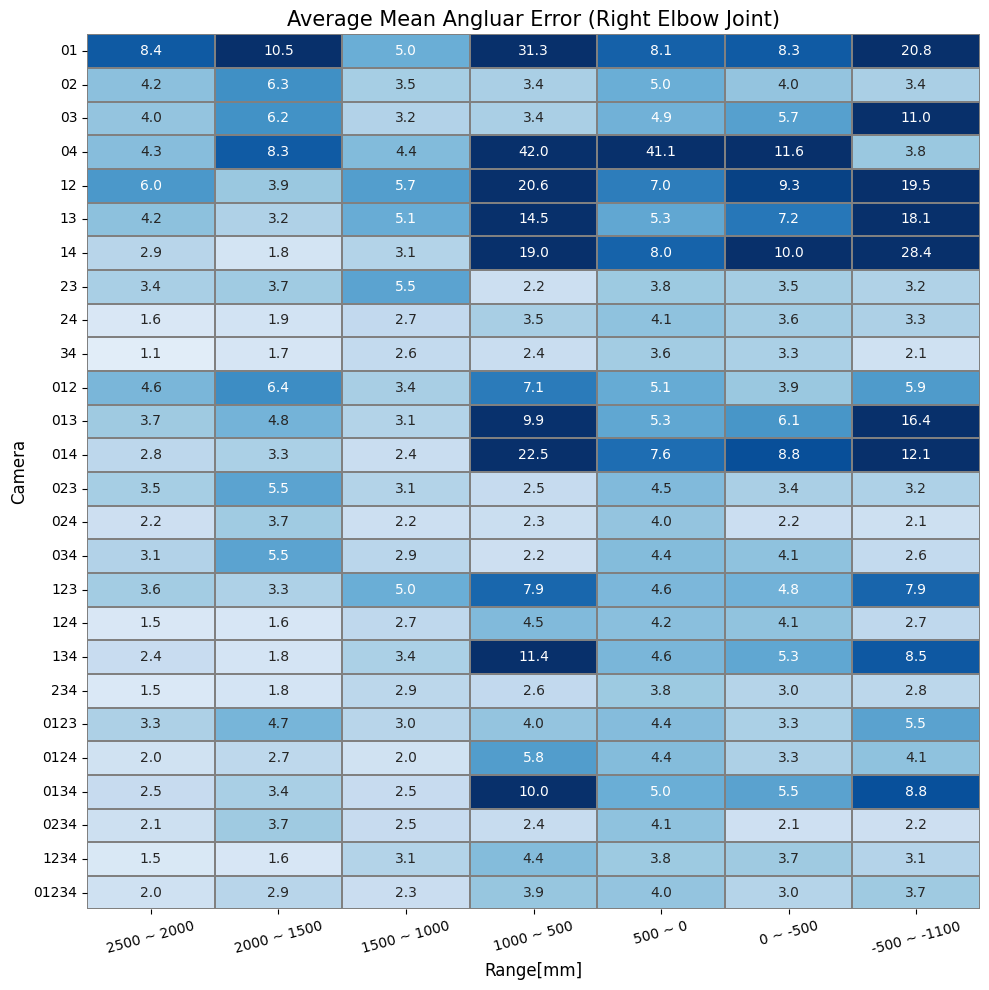

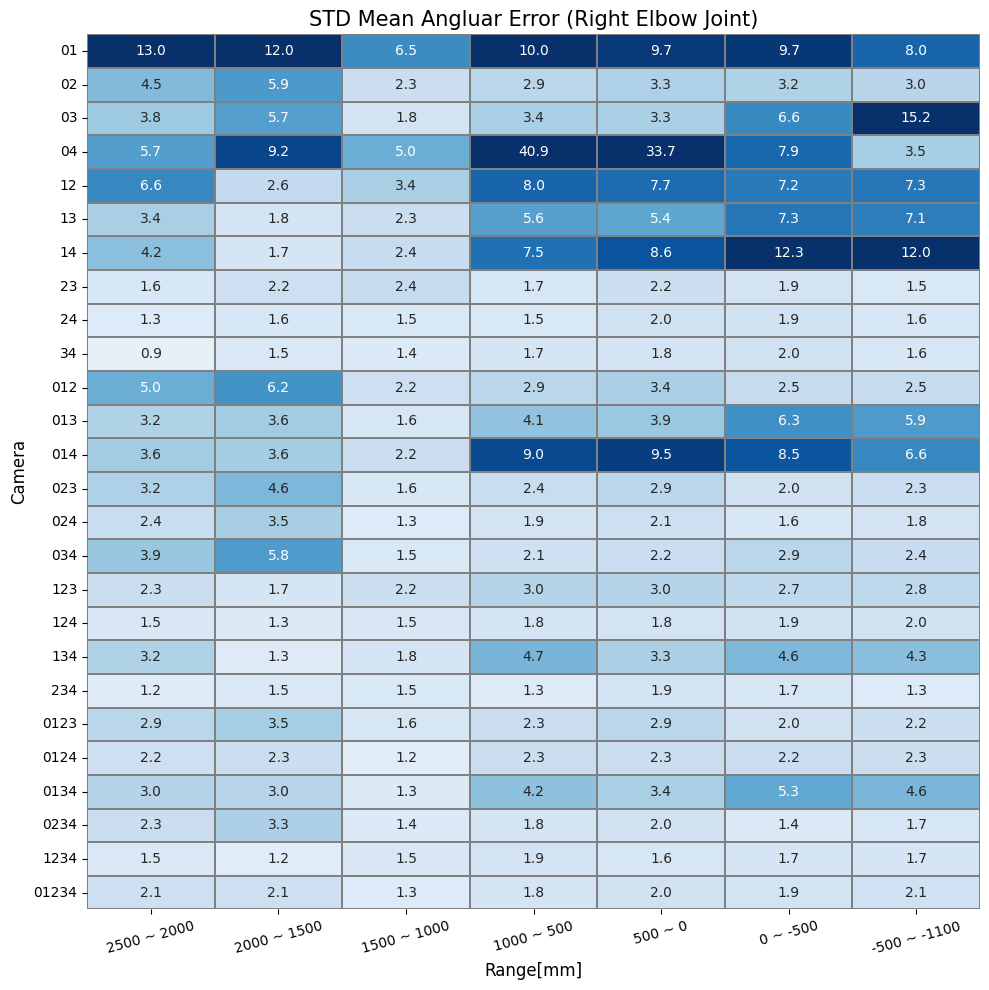

In [114]:
target_name = "RIGHT_ELBOW_ANGLE_angle"
target_columns = df_combined.filter(regex=target_name).columns.tolist() + ["Split"]
split_mean = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").mean()
split_std = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").std()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_mean.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("Average Mean Angluar Error (Right Elbow Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_average_heatmap.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_std.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("STD Mean Angluar Error (Right Elbow Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_std_heatmap.png")
plt.show()

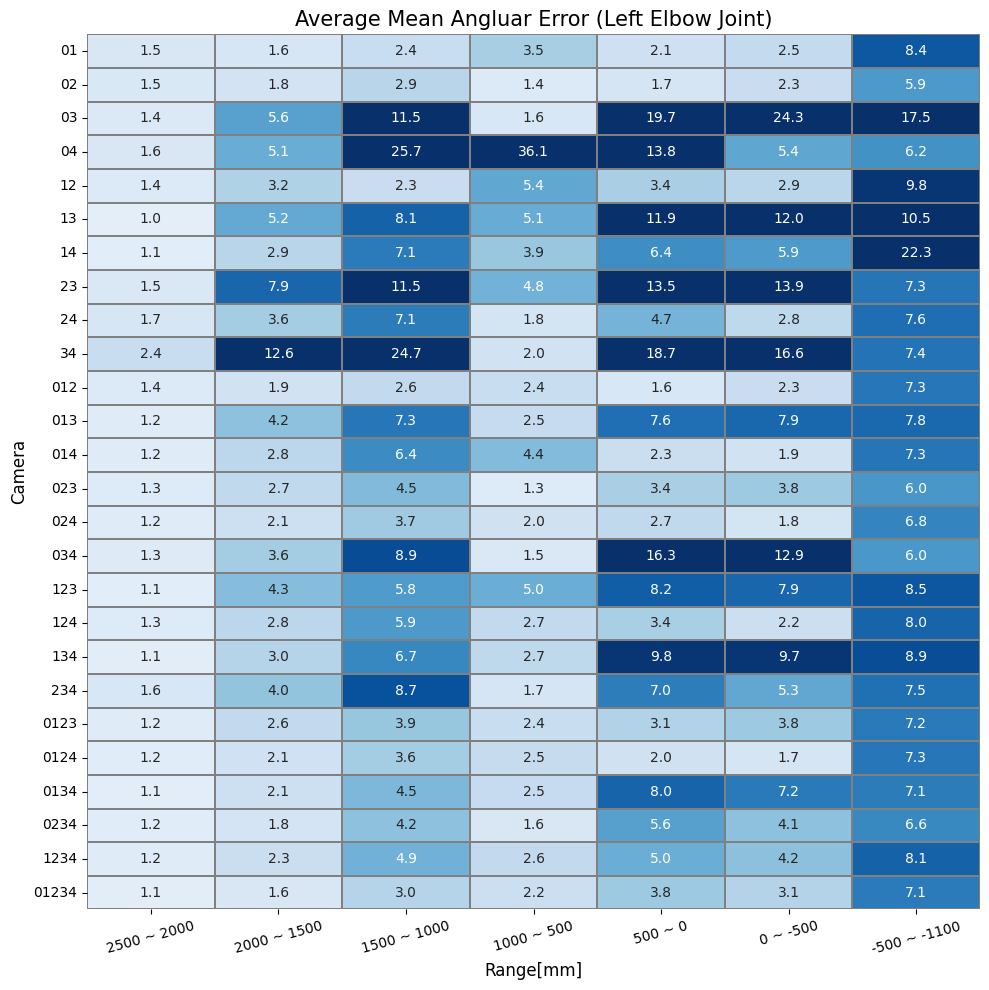

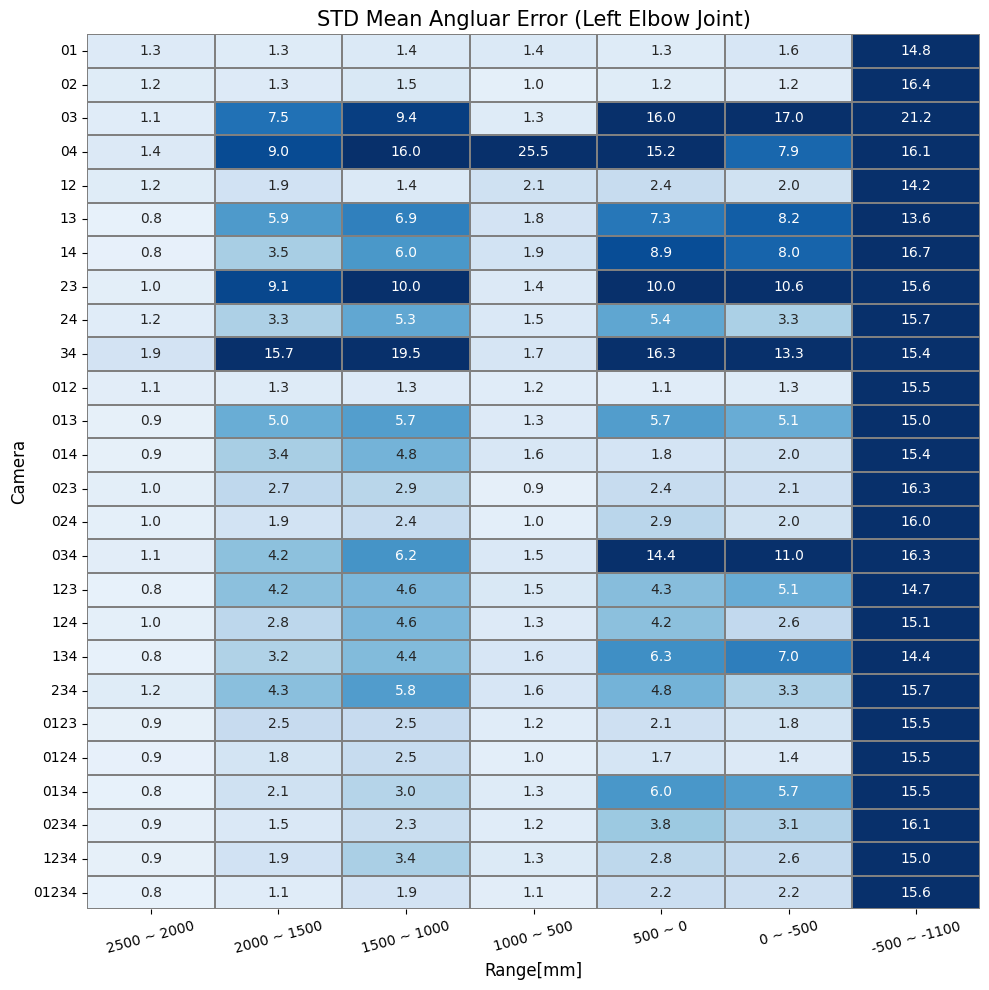

In [115]:
target_name = "LEFT_ELBOW_ANGLE_angle"
target_columns = df_combined.filter(regex=target_name).columns.tolist() + ["Split"]
split_mean = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").mean()
split_std = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").std()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_mean.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("Average Mean Angluar Error (Left Elbow Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_average_heatmap.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_std.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("STD Mean Angluar Error (Left Elbow Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_std_heatmap.png")
plt.show()

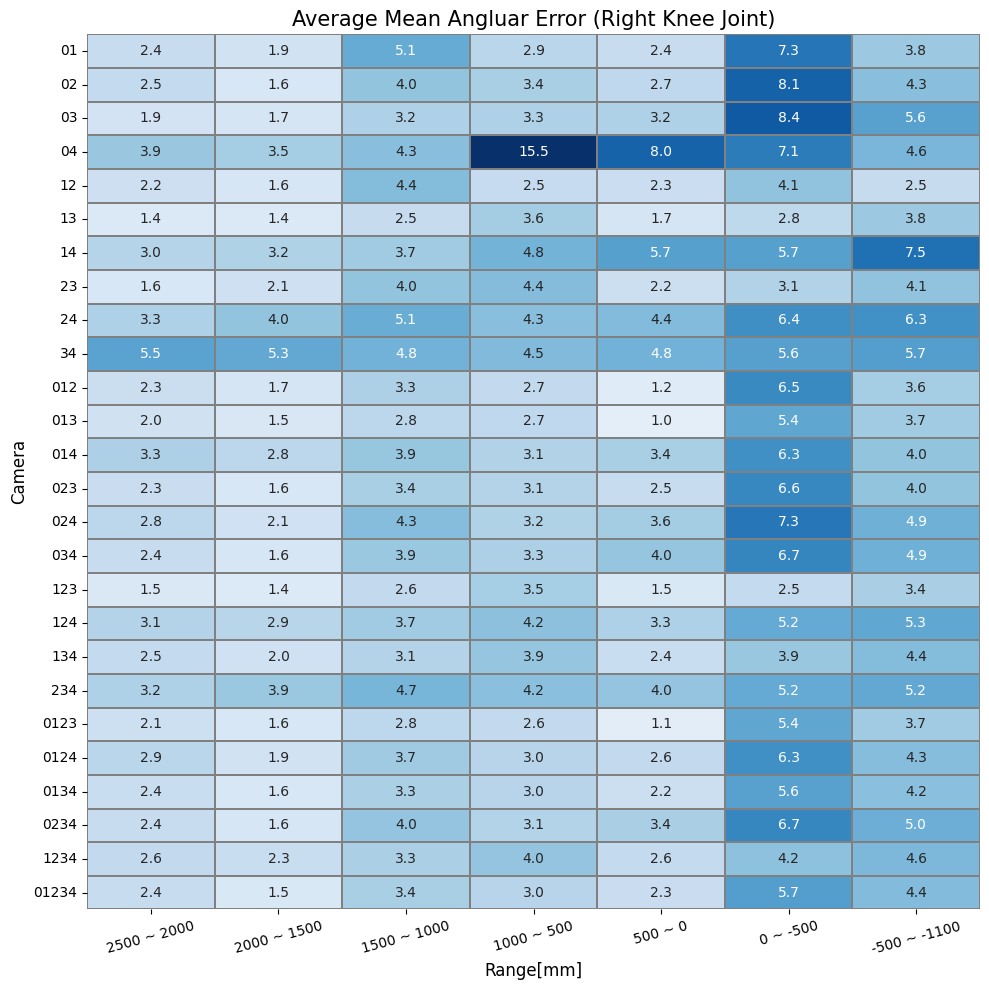

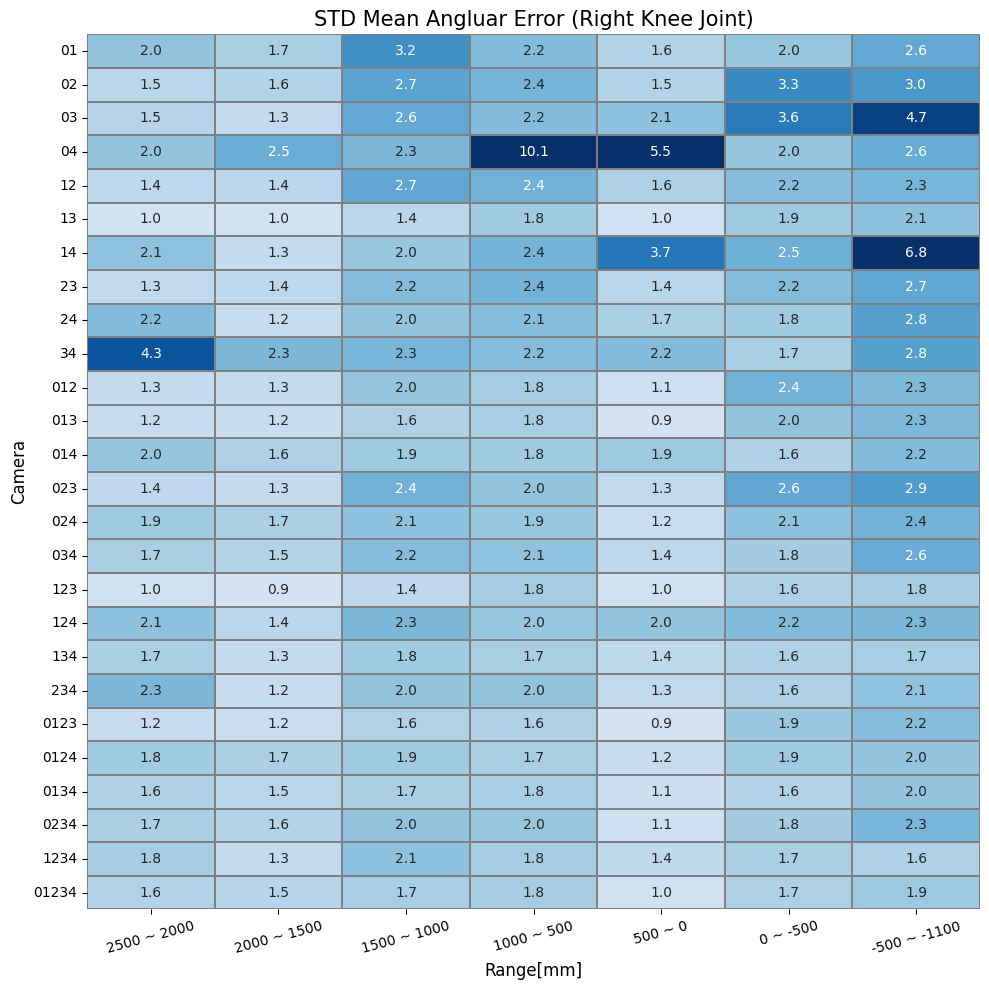

In [116]:
target_name = "RIGHT_KNEE_ANGLE_angle"
target_columns = df_combined.filter(regex=target_name).columns.tolist() + ["Split"]
split_mean = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").mean()
split_std = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").std()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_mean.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("Average Mean Angluar Error (Right Knee Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_average_heatmap.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_std.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=5, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("STD Mean Angluar Error (Right Knee Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_std_heatmap.png")
plt.show()

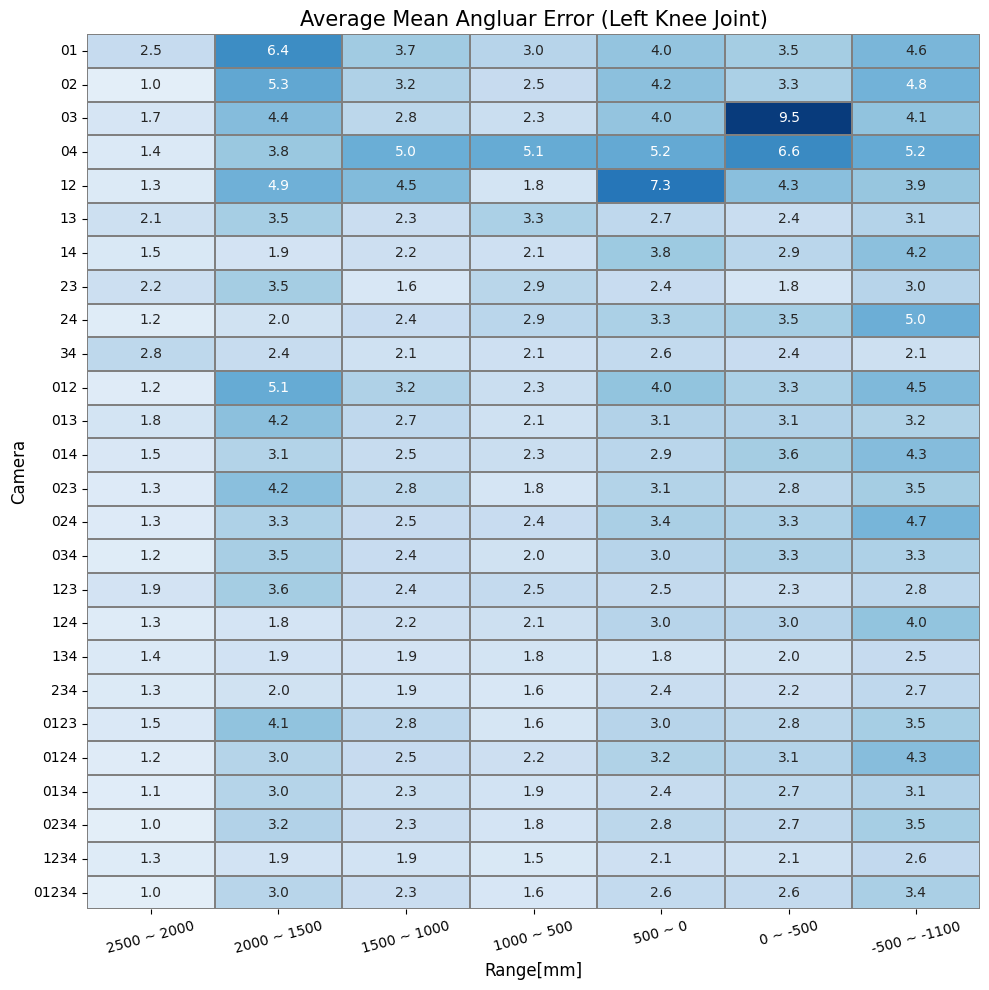

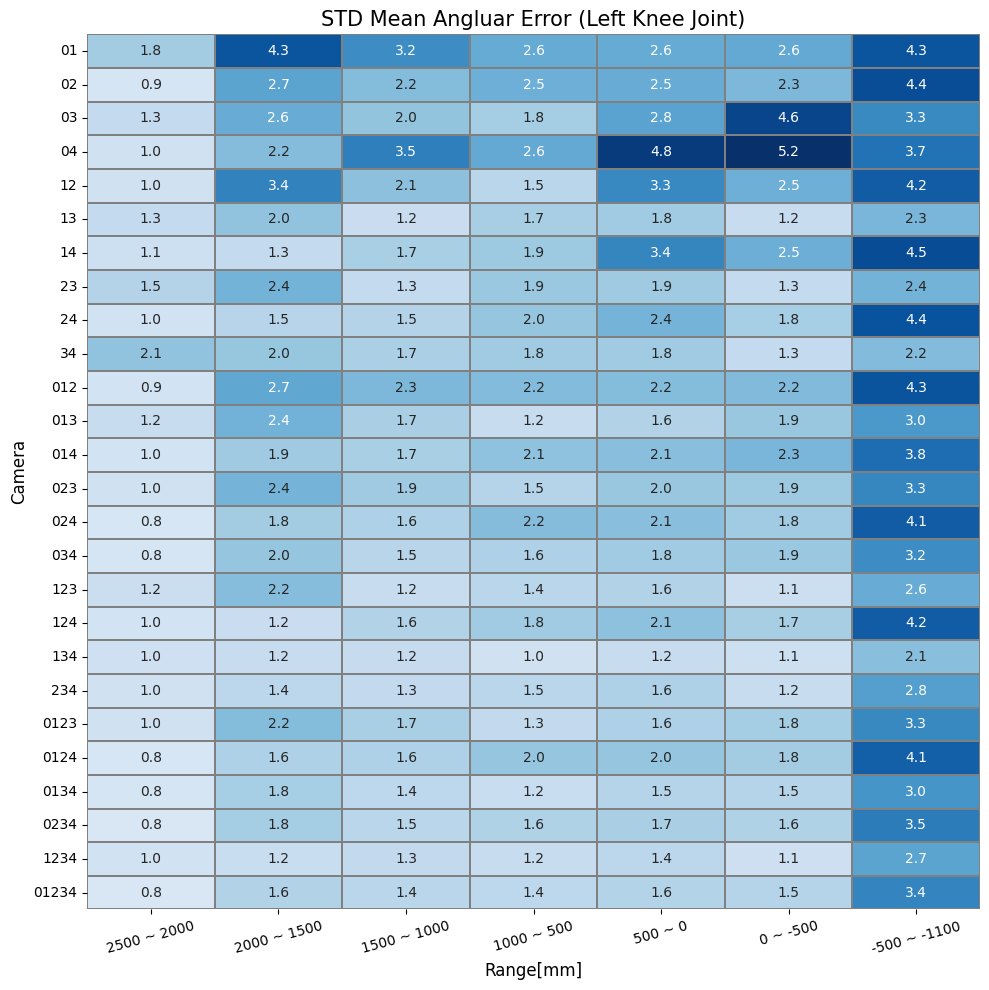

In [117]:
target_name = "LEFT_KNEE_ANGLE_angle"
target_columns = df_combined.filter(regex=target_name).columns.tolist() + ["Split"]
split_mean = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").mean()
split_std = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").std()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_mean.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("Average Mean Angluar Error (Left Knee Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_average_heatmap.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_std.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=5, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("STD Mean Angluar Error (Left Knee Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_std_heatmap.png")
plt.show()

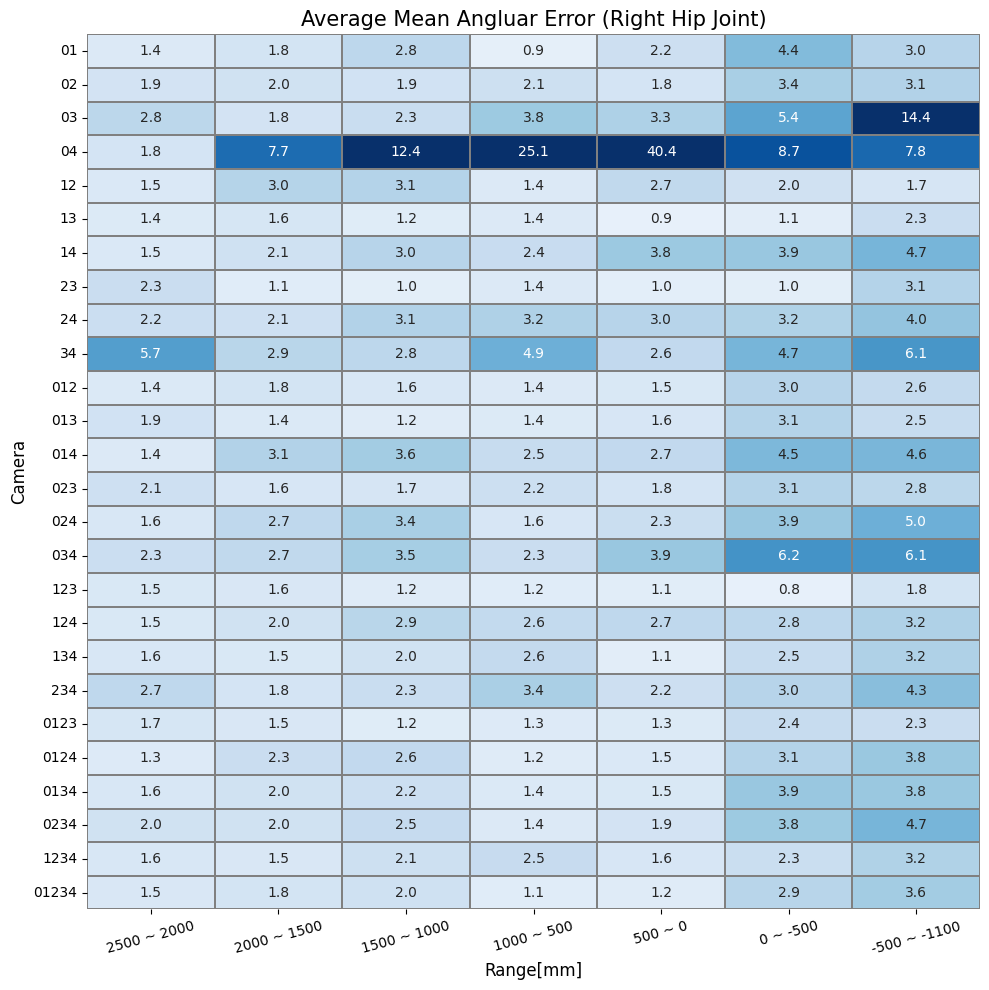

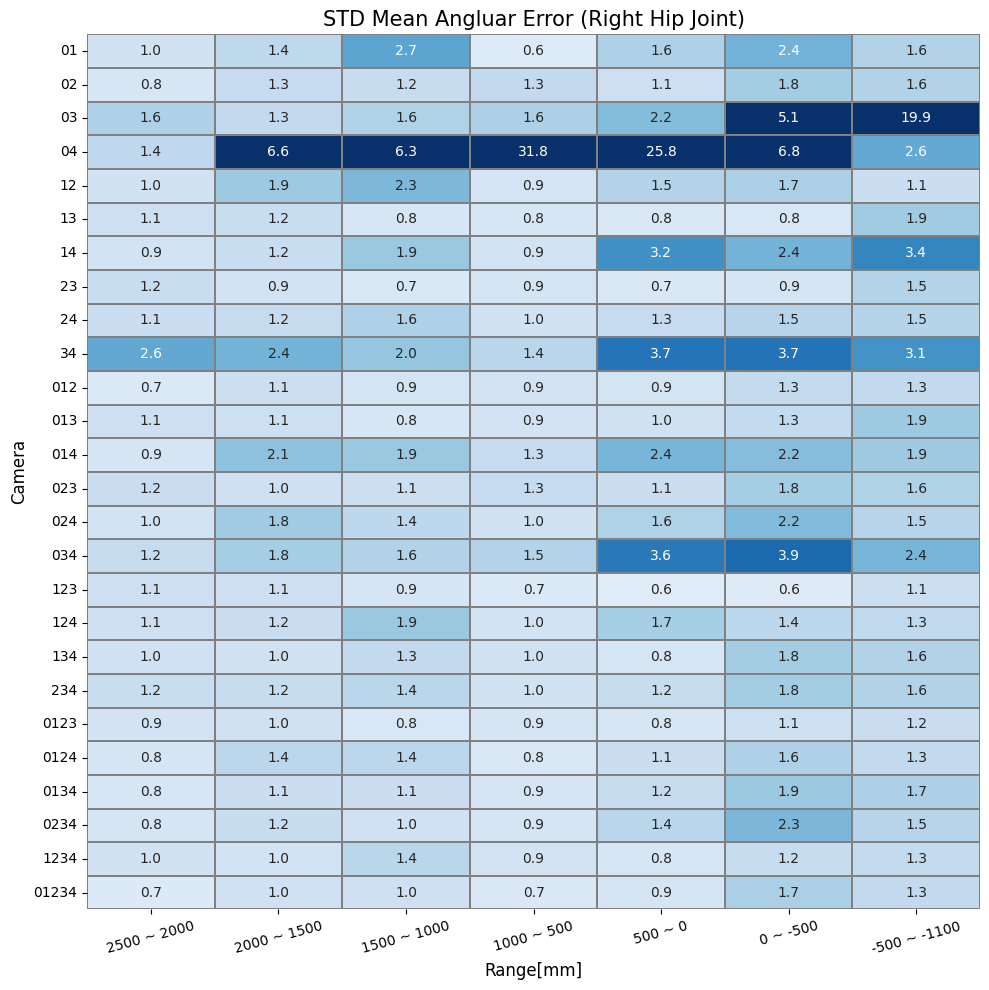

In [118]:
target_name = "RIGHT_NKEE_UP_ANGLE_angle"
target_columns = df_combined.filter(regex=target_name).columns.tolist() + ["Split"]
split_mean = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").mean()
split_std = df_combined[target_columns].rename(columns=lambda x: x.replace(f"_{target_name}", "")).groupby("Split").std()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_mean.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=10, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("Average Mean Angluar Error (Right Hip Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_average_heatmap.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(split_std.T, cmap="Blues", ax=ax, annot=True, fmt=".1f", linewidths=0.01, linecolor="gray", vmax=5, vmin=0, cbar=False)
ax.set_xlabel("Range[mm]", fontsize=12)
ax.set_xticklabels([f"{split_range[i]} ~ {split_range[i+1]}" for i in range(len(split_range)-1)], rotation=15)
ax.set_ylabel("Camera", fontsize=12)
plt.title("STD Mean Angluar Error (Right Hip Joint)", fontsize=15)
plt.tight_layout()
plt.savefig(f"{output_dir}/average_{target_name}_std_heatmap.png")
plt.show()

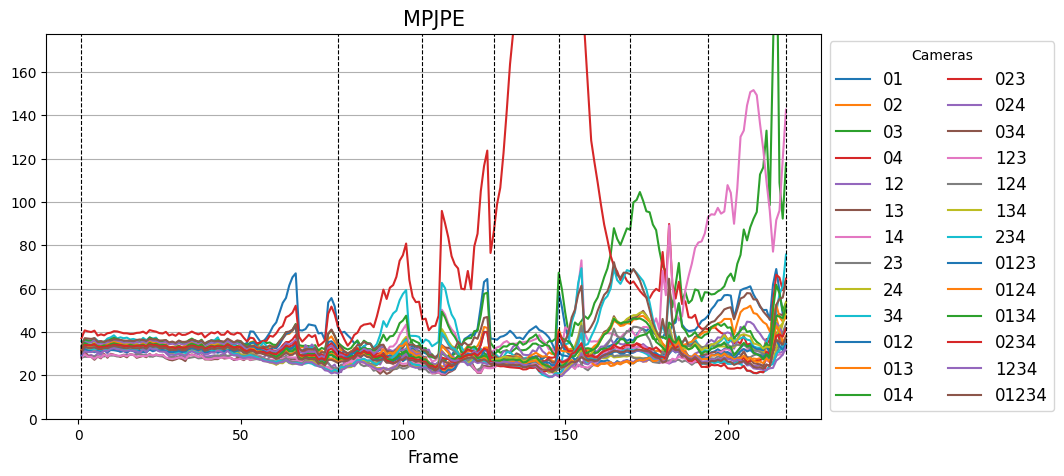

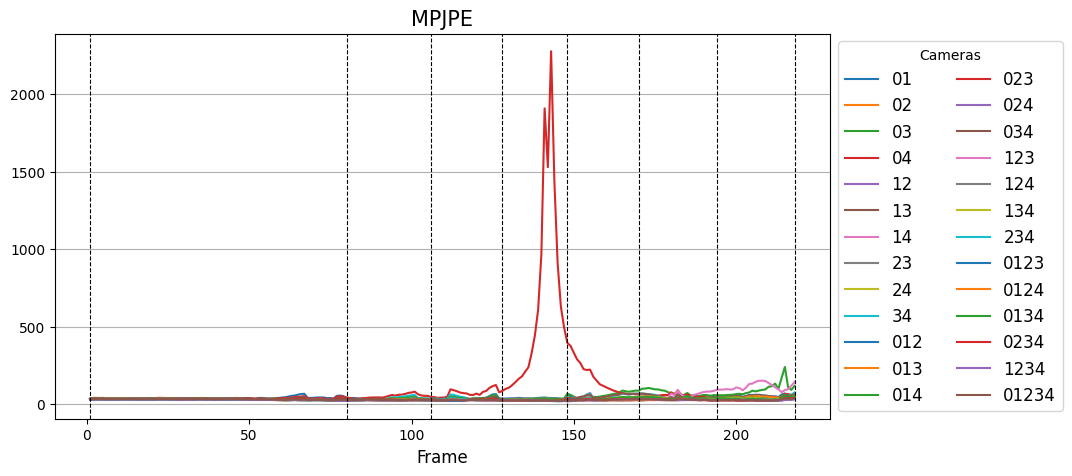

In [119]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="mpjpe").rename(columns=lambda x: x.replace("_mpjpe", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.90).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("MPJPE", fontsize=15)
plt.savefig(f"{output_dir}/mpjpe_{data_num}_90percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("MPJPE", fontsize=15)
plt.savefig(f"{output_dir}/mpjpe_{data_num}.png")
plt.show()

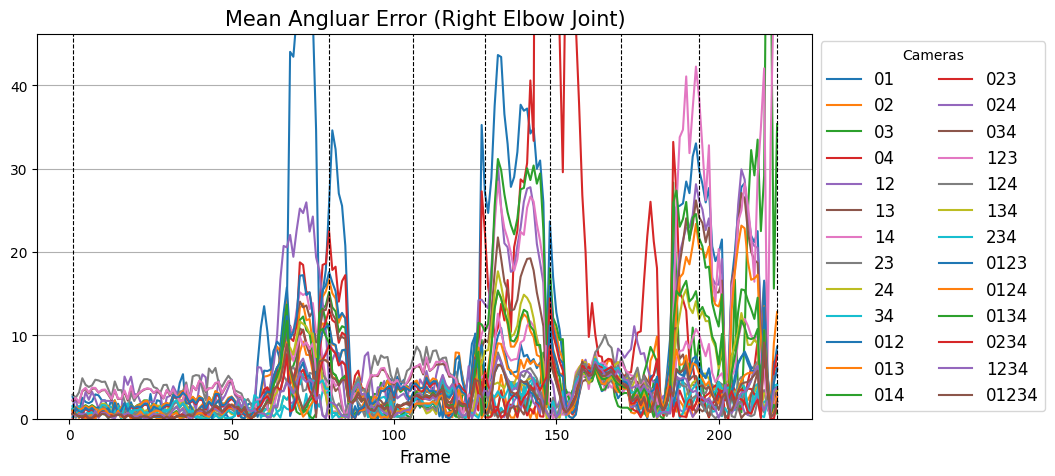

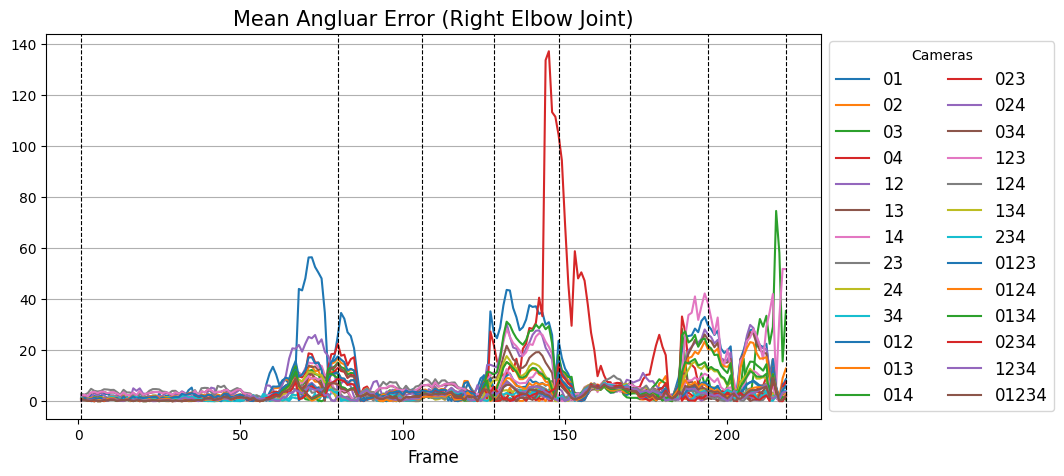

In [120]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="RIGHT_ELBOW_ANGLE_angle").rename(columns=lambda x: x.replace("_RIGHT_ELBOW_ANGLE_angle", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.95).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Right Elbow Joint)", fontsize=15)
plt.savefig(f"{output_dir}/RIGHT_ELBOW_ANGLE_angle_{data_num}_95percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Right Elbow Joint)", fontsize=15)
plt.savefig(f"{output_dir}/RIGHT_ELBOW_ANGLE_angle_{data_num}.png")
plt.show()

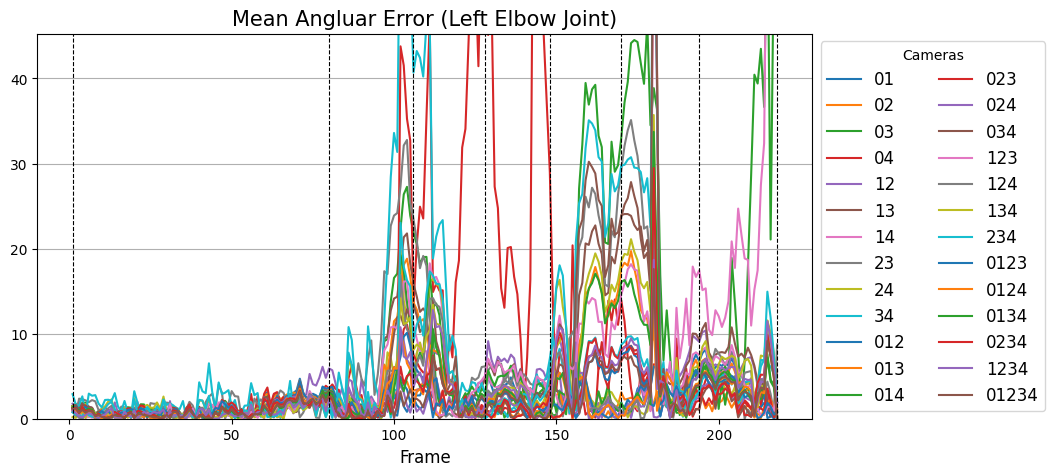

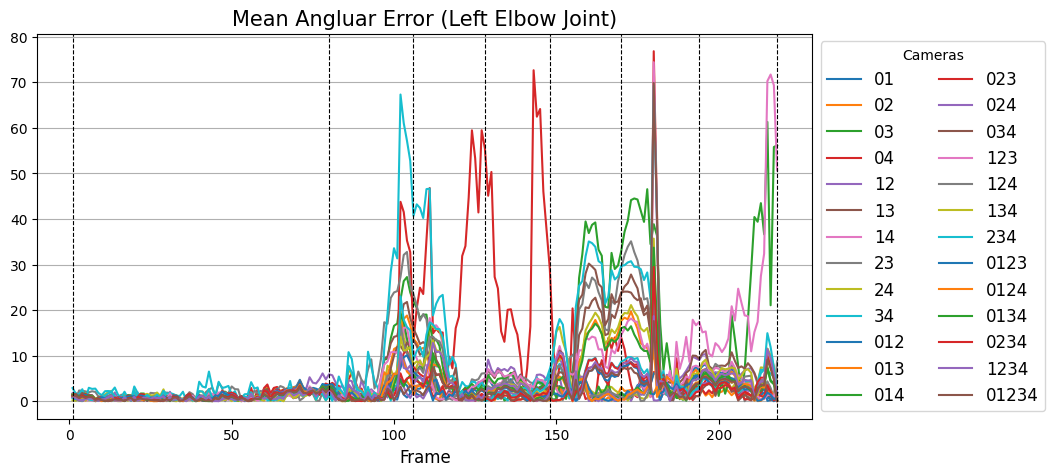

In [121]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="LEFT_ELBOW_ANGLE_angle").rename(columns=lambda x: x.replace("_LEFT_ELBOW_ANGLE_angle", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.95).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Left Elbow Joint)", fontsize=15)
plt.savefig(f"{output_dir}/LEFT_ELBOW_ANGLE_angle_{data_num}_95percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Left Elbow Joint)", fontsize=15)
plt.savefig(f"{output_dir}/LEFT_ELBOW_ANGLE_angle_{data_num}.png")
plt.show()

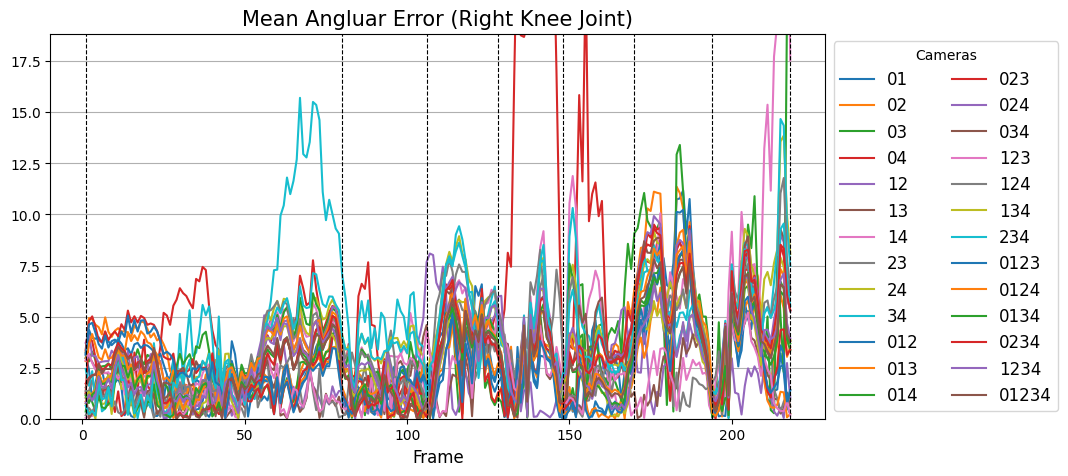

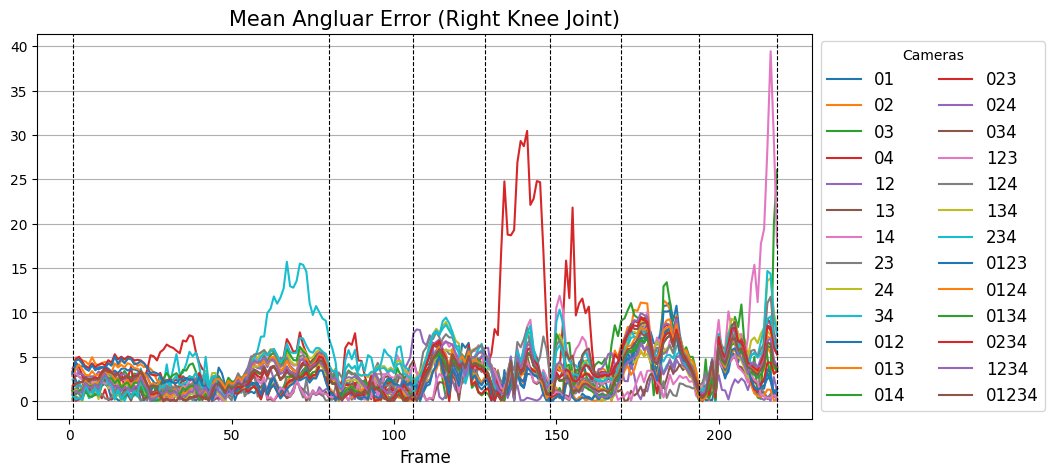

In [122]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="RIGHT_KNEE_ANGLE_angle").rename(columns=lambda x: x.replace("_RIGHT_KNEE_ANGLE_angle", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.95).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Right Knee Joint)", fontsize=15)
plt.savefig(f"{output_dir}/RIGHT_KNEE_ANGLE_angle_{data_num}_95percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Right Knee Joint)", fontsize=15)
plt.savefig(f"{output_dir}/RIGHT_KNEE_ANGLE_angle_{data_num}.png")
plt.show()

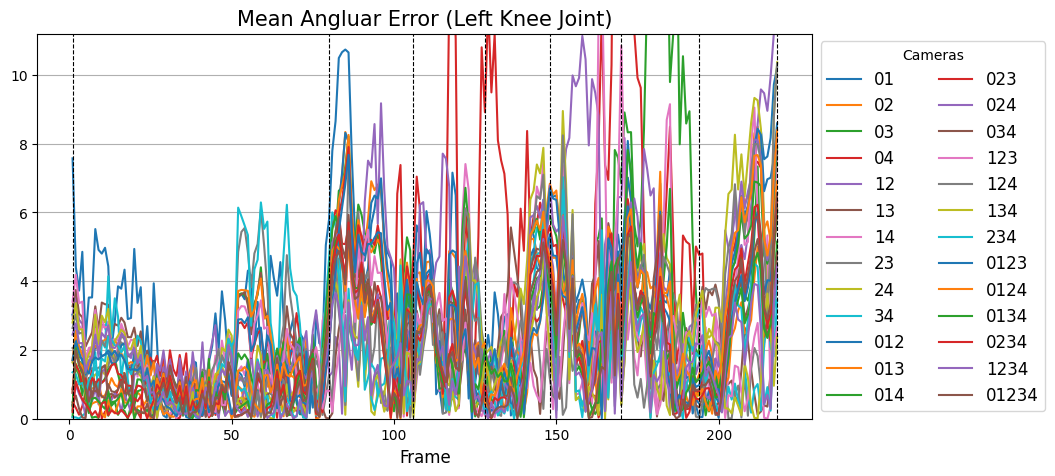

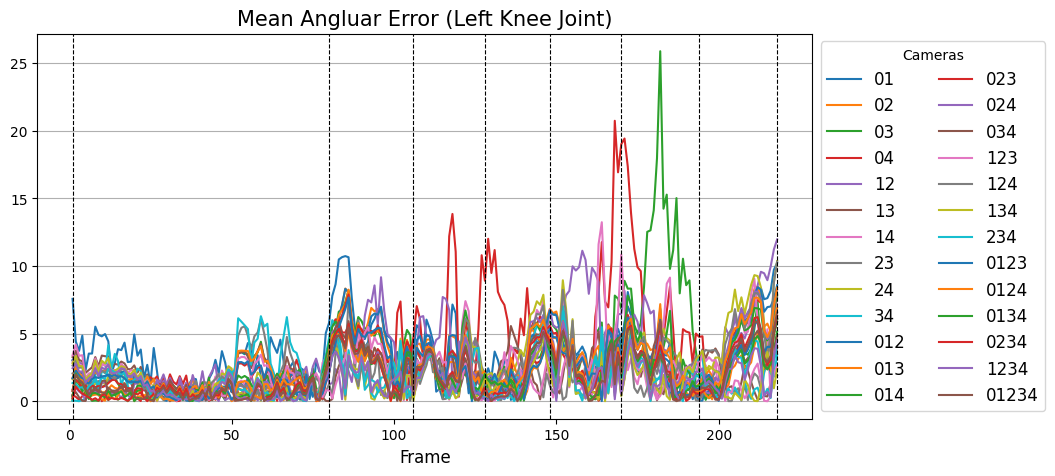

In [123]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="LEFT_KNEE_ANGLE_angle").rename(columns=lambda x: x.replace("_LEFT_KNEE_ANGLE_angle", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.95).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Left Knee Joint)", fontsize=15)
plt.savefig(f"{output_dir}/LEFT_KNEE_ANGLE_angle_{data_num}_95percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Left Knee Joint)", fontsize=15)
plt.savefig(f"{output_dir}/LEFT_KNEE_ANGLE_angle_{data_num}.png")
plt.show()

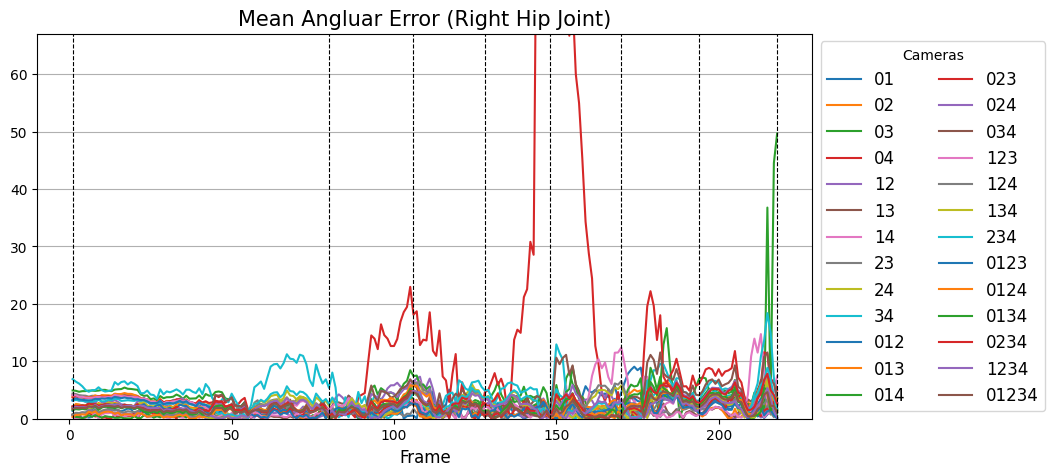

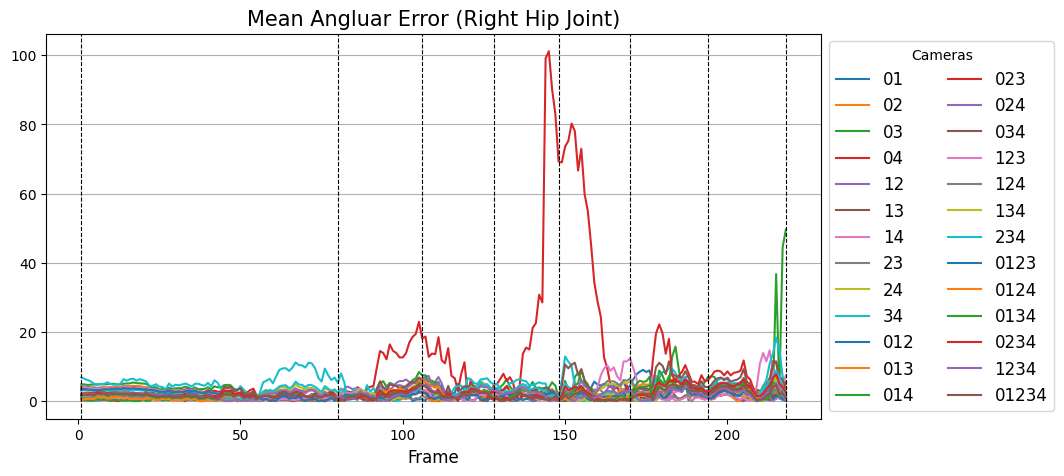

In [124]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="RIGHT_NKEE_UP_ANGLE_angle").rename(columns=lambda x: x.replace("_RIGHT_NKEE_UP_ANGLE_angle", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.95).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Right Hip Joint)", fontsize=15)
plt.savefig(f"{output_dir}/RIGHT_NKEE_UP_ANGLE_angle_{data_num}_95percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Right Hip Joint)", fontsize=15)
plt.savefig(f"{output_dir}/RIGHT_NKEE_UP_ANGLE_angle_{data_num}.png")
plt.show()

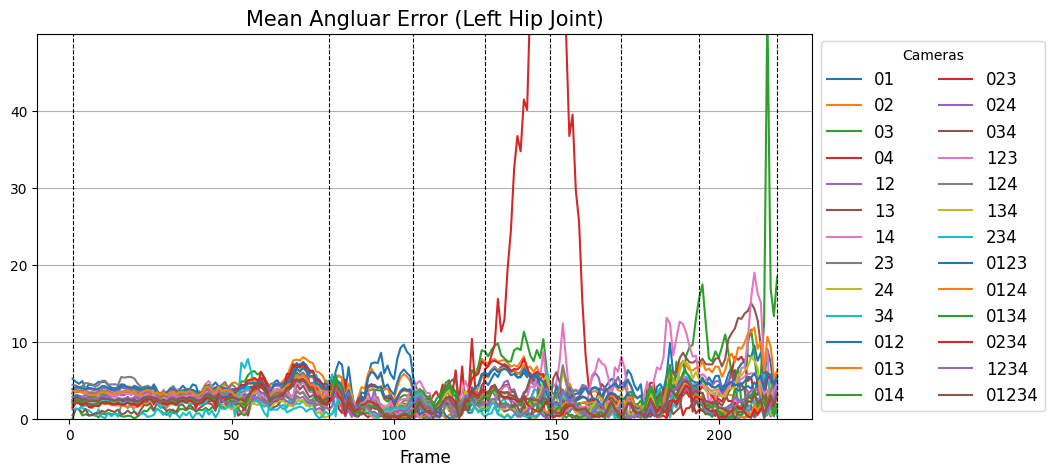

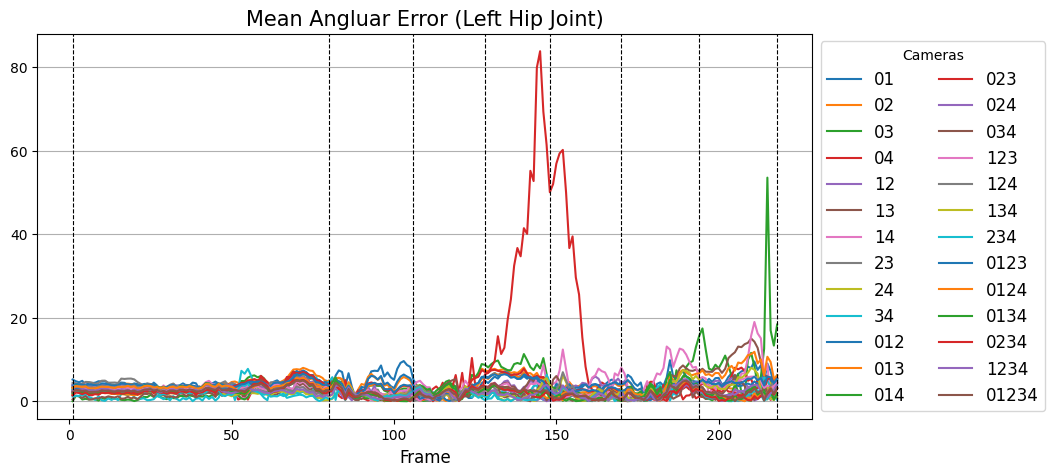

In [125]:
data_num = 1

data = df_combined.loc[data_num].filter(regex="LEFT_NKEE_UP_ANGLE_angle").rename(columns=lambda x: x.replace("_LEFT_NKEE_UP_ANGLE_angle", ""))
splits = df_summary.loc[data_num]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.set_ylim(0, data.quantile(0.95).max())
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Left Hip Joint)", fontsize=15)
plt.savefig(f"{output_dir}/LEFT_NKEE_UP_ANGLE_angle_{data_num}_95percentile.png")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data.plot(ax=ax)
for split in splits:
    ax.axvline(x=split, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel("Frame", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12, title="Cameras")
ax.grid(axis="y")
plt.title("Mean Angluar Error (Left Hip Joint)", fontsize=15)
plt.savefig(f"{output_dir}/LEFT_NKEE_UP_ANGLE_angle_{data_num}.png")
plt.show()